# Detección de anomalías con distribución gaussiana bivariada

Universidad Galileo



*Rodrigo Rafael Chang Papa*

*Carné: 19000625*



## Carga de librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***
## Carga de datos 
A continuación se cargan los datos de estatura y edad de los participantes del curso.

In [5]:
data = pd.read_csv("Estaturas.csv")
data.Edad = data.Edad.fillna(data.Edad.mean())
data.tail()

,Estatura,Edad
16,1.70,26.0
17,1.57,25.0
18,1.66,26.0
19,1.75,27.0
20,1.77,32.0


***
## Ajuste de la distribución bivariada
Obtenemos la matriz de varianzas y covarianzas $\Sigma$ y el vector $\mu$ de media de los datos.

In [7]:
sigma = np.cov(data.values.T)
sigma

array([[5.40285714e-03, 4.17500000e-02],
       [4.17500000e-02, 1.47250000e+01]])

In [9]:
mu = np.mean(data.values, axis=0)
mu

array([ 1.73142857, 27.5       ])

### Ajuste de la distribución con la clase *multivariate_normal*

In [21]:
from scipy.stats import multivariate_normal

# Clase para guardar la distribución
gaussian_model = multivariate_normal(mean=mu, cov=sigma)

Acá obtenemos la densidad de probabilidad de un valor de prueba. El individuo posee 1.77m de altura y 26 años.

In [22]:
gaussian_model.pdf([1.77, 26])

0.4443774062891986

### Gráfica de curvas de nivel de la población

In [25]:
data.Estatura.min(), data.Estatura.max()

(1.57, 1.85)

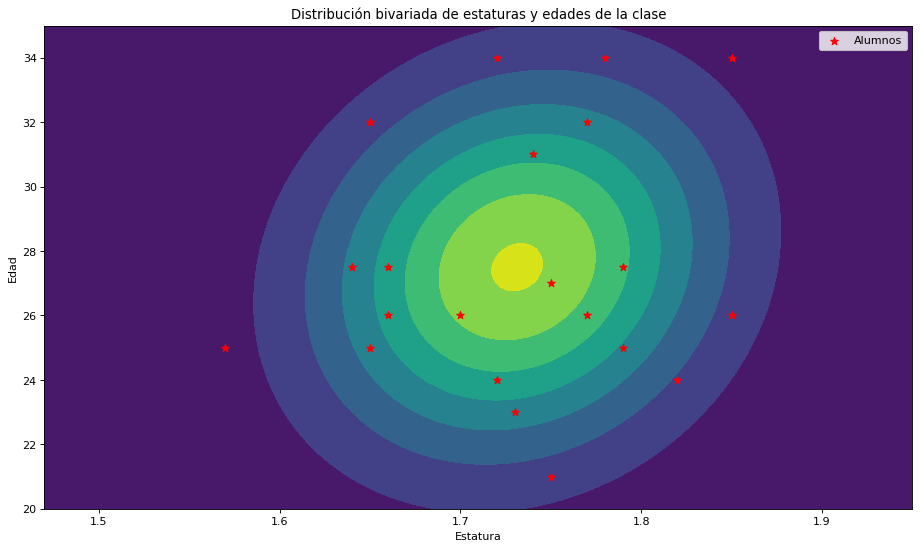

In [39]:
# Grilla de estaturas y edades
x, y = np.meshgrid(np.linspace(data.Estatura.min()-0.1, data.Estatura.max()+0.1, 100), 
                   np.linspace(data.Edad.min()-1, data.Edad.max()+1, 100))
# Valores apilados para obtener su pdf
z_pdf = gaussian_model.pdf(np.dstack((x, y)))

plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.contourf(x, y, z_pdf)
plt.scatter(data.Estatura.values, data.Edad.values, s=50, c='r', marker='*', label="Alumnos")
plt.title("Distribución bivariada de estaturas y edades de la clase")
plt.legend()
plt.xlabel("Estatura")
plt.ylabel("Edad");

### Detección de anomalías con valor de $\epsilon$

In [40]:
# Función para detectar anomalías
def detectarAnomalia(gaussian_model, observation, epsilon=0.1):
    prob = gaussian_model.pdf(observation)
    if prob < epsilon:
        print ("Es anomalia")
        return 1.
    else:
        print("No es anomalía")
        return 0.

Probamos nuestra función con un par de ejemplos:

In [43]:
observation = data.sample(1).values
print("Observación de ejemplo: ", observation)
detectarAnomalia(gaussian_model, observation)

Observación de ejemplo:  [[ 1.75 21.  ]]
No es anomalía


0.0

In [45]:
# Por ejemplo, pongo mis datos como ejemplo
detectarAnomalia(gaussian_model, np.array([1.85, 27]))

No es anomalía


0.0

Sin embargo, el resultado depende del valor de umbral ($\epsilon$) escogido. Por ejemplo, si el sistema de detección fuera más estricto, pediría que las observaciones superen un umbral más alto: 

In [46]:
# Repitiendo el ejemplo con mis datos, pero diferente umbral
detectarAnomalia(gaussian_model, np.array([1.85, 27]), epsilon=0.2)

Es anomalia


1.0